In [2]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
import nltk
from nltk import bigrams
from nltk import trigrams  

In [3]:
import gensim
from gensim import utils
import numpy as np
import sys
from sklearn.datasets import fetch_20newsgroups
from nltk import word_tokenize
from nltk import download
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
get_ipython().magic('matplotlib inline')

In [4]:
mercury_incidents = pd.read_excel(r'C:\Madhan\Analytics\Machine_Learning_project_work\AI_ML\IT_transition_mercury\TopicModelling\Mercury Incident List.xlsx',sheet_name='Page 1')

In [5]:
mercury_incidents.columns

Index(['Number', 'Requester', 'Short Description', 'Impacted Business Service',
       'Impacted Service Offering', 'Impacted application',
       'Impacted Device / Item', 'Status', 'Assignment Group', 'Assigned To',
       'Outage Type', 'Number of Users Impacted?', 'Priority', 'Updated',
       'Created', 'Created by', 'Category', 'Description', 'Environment',
       'Requestor Country', 'Resolution category'],
      dtype='object')

In [6]:
mercury_incidents.columns = [c.replace(' ','_') for c in mercury_incidents.columns]

In [7]:
mercury_incidents.columns

Index(['Number', 'Requester', 'Short_Description', 'Impacted_Business_Service',
       'Impacted_Service_Offering', 'Impacted_application',
       'Impacted_Device_/_Item', 'Status', 'Assignment_Group', 'Assigned_To',
       'Outage_Type', 'Number_of_Users_Impacted?', 'Priority', 'Updated',
       'Created', 'Created_by', 'Category', 'Description', 'Environment',
       'Requestor_Country', 'Resolution_category'],
      dtype='object')

In [8]:
mercury_incidents.Impacted_application.value_counts().head(10)

Billing Mercury                        880
My Engagements Maint Mercury           869
My Opportunities & Contacts Mercury    861
SAP GUI Mercury                        822
My Travel & Expense Mercury            743
Account Maint Mercury                  576
My timesheet – Grid (Mercury)          533
Program Mercury                        472
Manage My Access Mercury               335
EY/Mercury                             281
Name: Impacted_application, dtype: int64

In [9]:
travel_exp  = mercury_incidents[mercury_incidents.Impacted_application=='My Travel & Expense Mercury']

In [10]:
travel_exp.shape

(743, 21)

In [11]:
billing_mercury_words = ['urgent','gfis','mercury','billing','-',':','dear','pls','in01','issue','sap','chase','ticket','duplicate','incident',
                   'fdr','iii','III','bau','fup','fw','hypercare','<','>','my','T&E','t&e','pe1','global','gsa','sap','ca','de','name','engagement','maintenance','maint','please','hello',
                         'user','via','germany','vfx','bta','gsg','friday','july','made','try','ireland','new','getting','get',
                        'begin','hi','tthe','the']

In [12]:
engagement_maint_words = ['urgent','gfis','mercury','billing','-',':','dear','pls','in01','issue','sap','chase','ticket','duplicate','incident',
                   'fdr','iii','III','bau','fup','fw','hypercare','<','>','my','T&E','t&e','pe1','global','gsa','sap','ca','de','name','engagement','engagements','maintenance','maint','please','hello',
                         'user','via','germany','vfx','bta','gsg','friday','july','made','try','ireland','new','getting','get',
                        'begin','hi','tthe','the']

In [13]:
opportunities_contacts_words = ['opportunity','contact','urgent','gfis','mercury','billing','-',':','dear','pls','in01','issue','sap','chase','ticket','duplicate','incident',
                                'fdr','iii','III','bau','fup','fw','hypercare','<','>','my','T&E','t&e','pe1','global','gsa','sap','ca','de','name','engagement','engagements','maintenance','maint','please','hello',
                                 'user','via','germany','vfx','bta','gsg','friday','july','made','try','ireland','new','getting','get',
                                    'begin','hi','tthe','the','opportunities','contact','contacts']

In [14]:
sap_gui = ['opportunity','contact','urgent','gfis','gui','mercury','billing','-',':','dear','pls','in01','issue','sap','chase','ticket','duplicate','incident',
                                'fdr','iii','III','bau','fup','fw','hypercare','<','>','my','T&E','t&e','pe1','global','gsa','sap','ca','de','name','engagement','engagements','maintenance','maint','please','hello',
                                 'user','via','germany','vfx','bta','gsg','friday','july','made','try','ireland','new','getting','get',
                                    'begin','hi','tthe','the','opportunities','contact','contacts']

In [15]:
tra_exp = ['travel','expense','opportunity','contact','urgent','gfis','gui','mercury','billing','-',':','dear','pls','in01','issue','sap','chase','ticket','duplicate','incident',
                                'fdr','iii','III','bau','fup','fw','hypercare','<','>','my','T&E','t&e','pe1','global','gsa','sap','ca','de','name','engagement','engagements','maintenance','maint','please','hello',
                                 'user','via','germany','vfx','bta','gsg','friday','july','made','try','ireland','new','getting','get',
                                    'begin','hi','tthe','the','opportunities','contact','contacts']

In [16]:
SD = travel_exp.Short_Description

In [17]:
default_stopwords = set(nltk.corpus.stopwords.words('english'))

In [18]:
words = nltk.word_tokenize(str(SD))

In [19]:
words = [w.lower() for w in words if len(w)>2]

In [20]:
words = [w for w in words if not w.isnumeric()]

In [21]:
words = [w for w in words if not w in default_stopwords and w not in opportunities_contacts_words]

#UNIGRAM
tokens = str(corpus)
#tokens_words = nltk.word_tokenize(tokens)
unigram = nltk.FreqDist(words)
unigram = pd.DataFrame([unigram],columns=unigram.keys())
unigram = unigram.transpose()
#print(unigram)

#BIGRAM
tokens_1 = [token.lower() for token in words if len(token) > 3] #same as unigrams
bi_tokens = bigrams(tokens_1)
tri_tokens = trigrams(tokens_1)
bi_tokens = list(bi_tokens)
bi_token_count = [(item, bi_tokens.count(item)) for item in sorted(set(bi_tokens))]
bi_token_count = pd.DataFrame(bi_token_count)
bi_token_count = bi_token_count.rename(columns={0:'trigrams',1:'counts'})
sorted_counts_bi =  bi_token_count.sort_values(['counts'],ascending=False)
#bi_token_count.to_csv('Ground_bi_Not_OK_token.csv')

#TRIGRAM
tri_tokens = list(tri_tokens)
tri_token_count = [(item, tri_tokens.count(item)) for item in sorted(set(tri_tokens))]
tri_token_count = pd.DataFrame(tri_token_count)
#tri_token_count.to_csv('Ground_tri_Not_OK_token.csv')
tri_token_count = pd.DataFrame(tri_token_count)
tri_token_count = tri_token_count.rename(columns={0:'trigrams',1:'counts'})
sorted_counts_tri = tri_token_count.sort_values(['counts'], ascending=False)

In [25]:
def review_to_words( SD ):
    lm = WordNetLemmatizer()
    letters_only = re.sub("[^a-zA-Z]", " ", SD)
    sentences = nltk.word_tokenize(str(letters_only))
    sentences = [word.lower() for word in sentences]
    lem_word = [lm.lemmatize(word) for word in sentences if not word in default_stopwords and 
                word not in tra_exp]
    #tags = st.tag(lem_word)
    #tagged_words = [word for word,tag in tags if tag!='PERSON' and tag!='LOCATION']
    tokens = [word.lower() for word in lem_word if len(word) > 2]
    #print(tokens)
    return( " ".join(tokens))

In [29]:
print("Number of Rows Parsed......................\n")
corpus = []
num_SD = len(SD)
%time
for i in range( 0, num_SD ):
    corpus.append( review_to_words(str(SD.iloc[i])))

Number of Rows Parsed......................

Wall time: 0 ns


## TfIDFVectorizer

In [192]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,3),min_df=50,max_features=5000)

In [193]:
X_ok_dtm = tfidf.fit_transform(corpus)

In [194]:
X_ok_dtm.shape

(743, 26)

In [195]:
terms = tfidf.get_feature_names()

In [197]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

#lectures = ["this is some food", "this is some drink"]
#vectorizer = TfidfVectorizer()
#X = vectorizer.fit_transform(lectures)
indices = np.argsort(tfidf.idf_)[::-1]
features = tfidf.get_feature_names()
top_n = 10
top_features = [features[i] for i in indices[:top_n]]
print(top_features)

['day type travelsummary', 'property day type', 'day type', 'displayed', 'property day', 'day', 'error property', 'page', 'trip', 'unable']


In [198]:
counts =  tfidf.vocabulary_

## SVD for Dimension Reduction

In [199]:
svd = TruncatedSVD(n_components=6)

In [200]:
tfidfnew = svd.fit(X_ok_dtm)

In [201]:
var = tfidfnew.explained_variance_ratio_

In [202]:
sortedvar = np.sort(var)[::-1]

In [203]:
sortedvar.cumsum()

array([0.14904122, 0.2871876 , 0.41283469, 0.52827574, 0.640681  ,
       0.73281023])

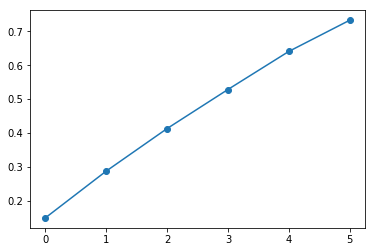

In [204]:
plt.plot(sortedvar.cumsum(),marker='o')

In [205]:
X_ok_dtm_new = tfidfnew.fit_transform(X_ok_dtm)

In [206]:
X_ok_dtm_new.shape

(743, 6)

## K_MEANS CLUSTERNING

In [217]:
from sklearn.cluster import KMeans

num_clusters = 7

km = KMeans(n_clusters=num_clusters)

%time km.fit(X_ok_dtm_new)

clusters = km.labels_.tolist()

Wall time: 53 ms


In [218]:
#km.predict()

In [219]:
len(clusters)

743

In [220]:
order_centroids = km.cluster_centers_.argsort()[:,::-1]

In [221]:
order_centroids.shape

(7, 6)

In [222]:
clusters_num = pd.DataFrame(clusters,columns={'clusters_num'})

In [223]:
#clusters_num.to_csv('billing_mercury_clusters.csv')

In [224]:
cluster_range = range( 1, 15 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X_ok_dtm_new )
    cluster_errors.append( clusters.inertia_ )

In [225]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

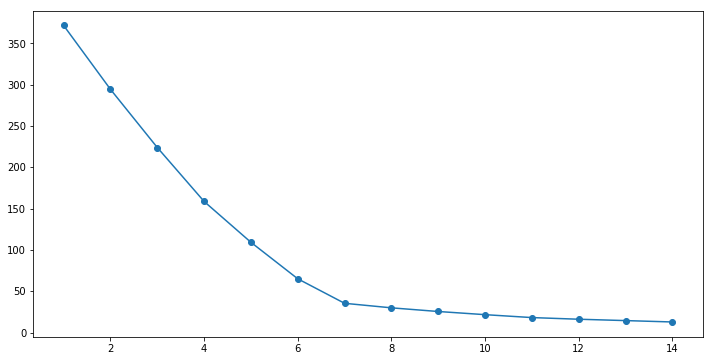

In [226]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
%matplotlib inline
plt.figure(figsize=((12,6)))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors,marker='o')

In [227]:
cluster_errors

[371.76694004529287,
 294.4486942947732,
 224.00580733811586,
 158.69387768739767,
 109.24004715823983,
 65.04552800269596,
 35.380387254870655,
 29.895573479091013,
 25.460843599642395,
 21.625294679394468,
 18.109016060402734,
 16.1020784910005,
 14.454511014703407,
 12.778342606790769]

In [228]:
corpus_df = pd.DataFrame(corpus,columns={'sd'})

In [229]:
cluster_wise = pd.concat([corpus_df,clusters_num],axis=1)

In [230]:
cluster_wise.to_csv('new.csv')

In [231]:
from sklearn.metrics import silhouette_score

In [232]:
silhouette_score(X_ok_dtm_new, clusters_num, sample_size=1000)

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7162839857538531

### Word2Vec based clustering

from gensim.models import Word2Vec
 
from nltk.cluster import KMeansClusterer
import nltk
 
 
from sklearn import cluster
from sklearn import metrics
 
# training data
 
sentences = [['this', 'is', 'the', 'good', 'machine', 'learning', 'book'],
            ['this', 'is',  'another', 'book'],
            ['one', 'more', 'book'],
            ['this', 'is', 'the', 'new', 'post'],
          ['this', 'is', 'about', 'machine', 'learning', 'post'],  
            ['and', 'this', 'is', 'the', 'last', 'post']]
 
 
# training model
model = Word2Vec(sentences, min_count=1)
 
# get vector data
X = model[model.vocab]
print (X)
 
print (model.similarity('this', 'is'))
 
print (model.similarity('post', 'book'))
 
print (model.most_similar(positive=['machine'], negative=[], topn=2))
 
print (model['the'])
 
print (list(model.vocab))
 
print (len(list(model.vocab)))
 
NUM_CLUSTERS=3
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)
 
words = list(model.vocab)
for i, word in enumerate(words):  
    print (word + ":" + str(assigned_clusters[i]))
 
 
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
 
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

In [61]:
from gensim.models import Word2Vec

from nltk.cluster import KMeansClusterer
import nltk
from sklearn import cluster
from sklearn import metrics

In [62]:
sentences = []
for c in corpus:
    words = nltk.word_tokenize(c)
    sentences.append(words)

In [63]:
len(sentences)


861

In [64]:
model = Word2Vec(sentences, min_count=1,workers=4,size=100,window=5,iter=10)

In [65]:
model.wv.syn0.shape

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


(885, 100)

In [31]:
#model.wv.vocab

In [67]:
word_vectors = model.wv.syn0
n_words = word_vectors.shape[0]
vec_size = word_vectors.shape[1]

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [68]:
print(n_words)
print(vec_size)

885
100


In [69]:
 print("#words = {0}, vector size = {1}".format(n_words, vec_size))

#words = 885, vector size = 100


In [70]:
# get vector data
X = model[model.wv.vocab]
print (X.shape)

(885, 100)


C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [71]:
X

array([[-3.24542460e-04,  1.52335921e-03,  3.37993610e-03, ...,
         5.08820778e-03, -4.04213415e-03,  1.65853801e-03],
       [-4.03461466e-03, -1.88614754e-03, -2.88080052e-03, ...,
        -3.98543291e-03, -1.15706958e-03, -2.05783872e-03],
       [ 1.00622805e-04,  1.28328812e-03, -9.03336186e-05, ...,
        -3.59648117e-03,  3.29354522e-03, -1.72626824e-05],
       ...,
       [ 4.09937184e-03,  4.45826119e-03,  1.36930612e-03, ...,
        -2.51958985e-03, -1.55083882e-03,  2.35670689e-03],
       [-8.05121846e-04, -3.56247113e-03,  4.25655674e-03, ...,
        -6.45229302e-04,  1.94643624e-03, -3.71824531e-03],
       [-3.97869200e-03, -2.56582932e-03, -1.01538817e-03, ...,
        -8.32921010e-04, -3.84589680e-03,  5.57518448e-04]], dtype=float32)

In [72]:
#print (model.wv.similar_by_word('this', 'is'))
#print (model.wv.similarity('post', 'book'))

print (model.most_similar(positive=['invoice'], negative=[], topn=10))
 
#print (model['the'])
 
#print (list(model.vocab))
#print (len(list(model.vocab)))

[('ought', 0.33913031220436096), ('system', 0.2881520092487335), ('exist', 0.2816569209098816), ('one', 0.2740943431854248), ('arabic', 0.27149125933647156), ('showing', 0.267214834690094), ('support', 0.2510755956172943), ('non', 0.2506261467933655), ('record', 0.24820856750011444), ('site', 0.24489423632621765)]


C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  after removing the cwd from sys.path.
C:\Users\madhan.s\AppData\Roaming\Python\Python36\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


# W2V WITH K MEANS 3RD APPROAOCH

In [73]:
model.save('word2vec')

In [74]:
model = gensim.models.KeyedVectors.load('word2vec')

In [75]:
def average_word_vectors(words, model, vocabulary, num_features):
    
    feature_vector = np.zeros((num_features,),dtype="float64")
    nwords = 0.
    
    for word in words:
        if word in vocabulary: 
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model[word])
    
    if nwords:
        feature_vector = np.divide(feature_vector, nwords)
        
    return feature_vector

In [76]:
def averaged_word_vectorizer(corpus, model, num_features):
    vocabulary = set(model.wv.index2word)
    features = [average_word_vectors(tokenized_sentence, model, vocabulary, num_features)
                    for tokenized_sentence in corpus]
    return np.array(features)

In [77]:
# get document level embeddings
w2v_feature_array = averaged_word_vectorizer(corpus=sentences, model=model,
                                             num_features=100)
pd.DataFrame(w2v_feature_array)

C:\Users\madhan.s\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.002204,0.001507,-0.000235,-0.000455,0.000421,0.000602,-0.002599,0.000094,0.000142,-0.001287,...,-0.003429,0.001350,-0.001562,0.001449,-0.002425,0.001565,-0.001960,0.001110,0.001425,0.002535
1,-0.004938,0.006334,-0.001846,-0.002288,0.001715,-0.002845,-0.003325,-0.000625,-0.003714,0.001614,...,-0.000864,0.005329,-0.001513,0.001432,-0.001132,-0.002868,0.000578,0.000096,0.001601,0.002452
2,0.003452,-0.000433,-0.002702,-0.000527,0.001589,-0.002488,0.001214,0.002177,-0.000136,0.001778,...,-0.000401,-0.003920,-0.004723,0.001071,-0.000631,0.001823,0.000865,-0.000046,-0.000861,-0.000612
3,0.004198,-0.001900,0.000056,-0.003056,0.001619,-0.005189,0.002534,0.004452,-0.000262,-0.004269,...,0.003948,0.002471,-0.001216,-0.002612,0.005073,0.002011,-0.001073,-0.001744,-0.000568,-0.002007
4,-0.004428,0.001475,-0.004382,0.004431,-0.002143,0.004407,-0.003956,-0.001937,-0.004570,-0.004468,...,0.003309,-0.004495,-0.001286,-0.002990,0.000478,-0.000282,-0.000271,-0.000355,0.003725,-0.004432
5,-0.003236,0.005001,0.002804,-0.004965,0.002472,-0.002480,-0.002158,0.001383,-0.001746,0.001304,...,0.000525,0.001791,-0.002447,0.003858,-0.001412,-0.001703,-0.000299,0.005088,0.001254,-0.000974
6,0.002743,-0.000346,-0.000570,0.000908,-0.000919,-0.002281,0.001653,0.000938,-0.005450,-0.000425,...,-0.004704,0.005784,0.001503,0.004610,0.002847,-0.005583,-0.000245,0.000456,0.005517,0.002423
7,-0.003995,-0.000150,0.004212,-0.003693,0.004074,0.001388,-0.000417,-0.002891,-0.003850,0.004236,...,-0.003492,0.001888,-0.003256,-0.000280,0.002791,0.003823,0.000774,-0.001576,-0.001609,-0.000106
8,-0.003256,0.006975,-0.001061,-0.002929,-0.001305,-0.004301,0.002180,0.003190,-0.000918,0.003324,...,0.000821,0.001701,-0.001007,-0.003266,-0.000900,0.000271,0.002530,-0.001555,0.002191,0.001299
9,-0.004089,0.007476,0.002652,-0.006828,0.000346,-0.000544,-0.002686,0.001553,-0.004417,-0.000127,...,-0.000694,0.003141,-0.002516,0.004322,-0.002176,-0.002749,-0.001844,0.002912,0.001102,0.002733


In [78]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation()
ap.fit(w2v_feature_array)
cluster_labels = ap.labels_
cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
#pd.concat([corpus_df, cluster_labels], axis=1)

In [79]:
cluster_labels.shape

(861, 1)

In [80]:
 
kmeans = cluster.KMeans(n_clusters=6)
#kmeans.fit(X)
kmeans.fit(w2v_feature_array)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels.size)
print ("Centroids data")
print (centroids.size)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(w2v_feature_array))
 
silhouette_score = metrics.silhouette_score(w2v_feature_array, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
861
Centroids data
600
Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-0.24192590136838726
Silhouette_score: 
0.08291587084954603


In [81]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
    kmeans = KMeans( num_clusters )
    kmeans.fit(w2v_feature_array)
    cluster_errors.append( kmeans.inertia_ )

In [82]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [83]:
cluster_errors

[0.31184189088149533,
 0.27517950188125684,
 0.263451795052003,
 0.2552206406576656,
 0.2479774283884787,
 0.24080228457091263,
 0.23657129022633838,
 0.23235104461466413,
 0.22415768783104534]

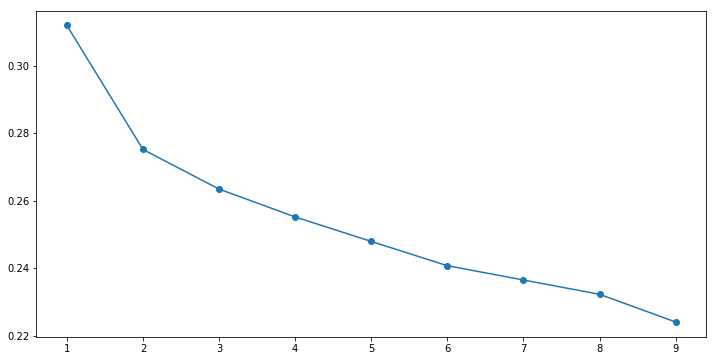

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
%matplotlib inline
plt.figure(figsize=((12,6)))
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors,marker='o')

In [85]:
labels = pd.DataFrame(labels,columns={'w2vclusternum'})

In [86]:
w2vcluster_wise = pd.concat([corpus_df,labels],axis=1)

In [1218]:
w2vcluster_wise.to_csv('w2vcluster.csv')